In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import joblib # Note: require sklearn v0.22+ (to update sklearn: pip install -U scikit-learn ). For old version sklearn: from sklearn.externals import joblib 
from sklearn.linear_model import SGDClassifier  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict 
import random

In [5]:
from tensorflow import keras
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# 1.2. Reshape to 2D array: each row has 784 (28X28 pixel) features
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

In [6]:
y_train_2 = (y_train == 2) 
y_test_2 = (y_test == 2)

In [7]:
new_run = False
if new_run:
    from sklearn.linear_model import SGDClassifier       
    sgd_clf = SGDClassifier(random_state=42, max_iter=100) # set random_state to reproduce the result
    sgd_clf.fit(X_train, y_train) # y_train, not y_train_2
    joblib.dump(sgd_clf,'saved_var/sgd_clf_multi')
else:
    sgd_clf = joblib.load('saved_var/sgd_clf_multi')

In [8]:
# Try prediction

sample_id = 15
print(sgd_clf.predict([X_train[sample_id]]))
print(y_train[sample_id])
# To see scores from classifers
print(sgd_clf.classes_)
sample_scores = sgd_clf.decision_function([X_train[sample_id]]) 
print(sample_scores)
class_with_max_score = np.argmax(sample_scores)

[9]
9
[0 1 2 3 4 5 6 7 8 9]
[[ -70375.38111943  -80421.17179755  -63193.89185674  -98200.2008379
  -146364.53775501  -20055.27125229  -35792.47198095  -35893.26816411
   -65500.26628055   12958.13892661]]


In [9]:
count = 0
for i in range(100):
  sample_id = random.randint(1, 60000)
  predict = sgd_clf.predict([X_train[sample_id]])
  label = y_train[sample_id]
  if predict == label:
    count += 1
print(count)


82


In [ ]:
(78 + 81 + 82)/3

In [10]:
from sklearn.multiclass import OneVsRestClassifier
# Warning: takes time for new run!
new_run = False 
ova_clf = OneVsRestClassifier(SGDClassifier(random_state=42))
if new_run == True:
    ova_clf.fit(X_train, y_train)
    joblib.dump(ova_clf,'saved_var/ova_clf')
else:
    ova_clf = joblib.load('saved_var/ova_clf')
print(len(ova_clf.estimators_))
sample_scores = ova_clf.decision_function([X_train[sample_id]]) 
print(sample_scores)

10
[[ -20754.20426446  -30855.96858281  -22632.50511505  -13557.8951233
     1245.89121588  -96818.27657805    2622.20021113 -126147.96892514
   -21582.09196228  -77445.75528105]]


In [11]:
from sklearn.multiclass import OneVsOneClassifier
# Warning: takes time for new run! 
new_run = False
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
if new_run == True:
    ovo_clf.fit(X_train, y_train)
    joblib.dump(ovo_clf,'saved_var/ovo_clf')
else:
    ovo_clf = joblib.load('saved_var/ovo_clf')
print(len(ovo_clf.estimators_))
sample_scores = ovo_clf.decision_function([X_train[sample_id]]) 
print(sample_scores)

45
[[ 4.33333311  2.66666704  7.33333325  6.33333317  9.33333326  1.66666678
   8.33333323  0.66666672  5.33333315 -0.33333329]]


In [12]:
randomForest = False
rfc = RandomForestClassifier(n_estimators=70, oob_score=True, random_state=101)
if randomForest:
  rfc.fit(X_train, y_train)
  joblib.dump(rfc,'saved_var/rfc_binary')
else:
  rfc = joblib.load('saved_var/rfc_binary')

In [13]:
new_run = False
if new_run == True:
    sgd_acc = cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")
    joblib.dump(sgd_acc,'saved_var/sgd_acc_multi')
else:
    sgd_acc = joblib.load('saved_var/sgd_acc_multi')
print(sgd_acc)

[0.78315 0.81355 0.82255]


In [14]:
if new_run == True:
    forest_acc = cross_val_score(rfc, X_train, y_train, cv=3, scoring="accuracy")
    joblib.dump(forest_acc,'saved_var/forest_acc_multi')
else:
    forest_acc = joblib.load('saved_var/forest_acc_multi')
print(forest_acc)


[0.87455 0.8801  0.87755]


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [16]:
new_run = False
# 7.1. SGDClassifier (benefited from feature scaling)
# Warning: takes time for new run! 
if new_run == True:
    sgd_acc_after_scaling = cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy", n_jobs=4)
    joblib.dump(sgd_acc_after_scaling,'saved_var/sgd_acc_after_scaling')
else:
    sgd_acc_after_scaling = joblib.load('saved_var/sgd_acc_after_scaling')
print(sgd_acc_after_scaling)

[0.83035 0.83545 0.83725]


In [17]:
if new_run == True:
    forest_acc_after_scaling = cross_val_score(rfc, X_train_scaled, y_train, cv=3, scoring="accuracy", n_jobs=4)
    joblib.dump(forest_acc_after_scaling,'saved_var/forest_acc_after_scaling')
else:
    forest_acc_after_scaling = joblib.load('saved_var/forest_acc_after_scaling')
print(forest_acc_after_scaling)

[0.8746  0.88005 0.8778 ]


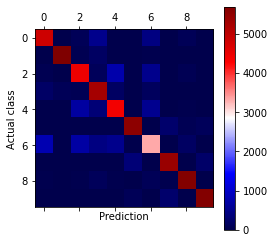

In [18]:
new_run = False
if new_run == True:
    y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
    joblib.dump(y_train_pred,'saved_var/y_train_pred_step8')
else:
    y_train_pred = joblib.load('saved_var/y_train_pred_step8')
conf_mat = confusion_matrix(y_train, y_train_pred) # row: actual class, col: prediction
let_plot = True;
if let_plot:
    plt.matshow(conf_mat, cmap=plt.cm.seismic)
    plt.xlabel("Prediction")
    plt.ylabel("Actual class")
    plt.colorbar()
    plt.savefig("figs/confusion_matrix_plot")
    plt.show()

In [19]:
conf_mat

array([[4806,   19,  111,  514,   22,    1,  429,    0,   98,    0],
       [  12, 5688,   47,  198,   16,    1,   35,    0,    3,    0],
       [  46,    5, 4461,  126,  766,    1,  521,    1,   73,    0],
       [ 211,  106,   72, 5249,  197,    0,  150,    0,   15,    0],
       [   8,    4,  676,  354, 4394,    0,  536,    1,   27,    0],
       [   3,    3,    2,   13,    2, 5520,    6,  256,   69,  126],
       [ 806,   19,  700,  435,  533,    0, 3311,    1,  194,    1],
       [   0,    0,    0,    0,    0,  353,    0, 5390,   15,  242],
       [  31,    3,   29,  129,   37,   11,   97,   35, 5622,    6],
       [   0,    3,    0,    6,    0,  106,    2,  249,    4, 5630]],
      dtype=int64)

C:\Users\hp\AppData\Local\Temp\ipykernel_20324\4159988041.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "tight_layout" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("figs/confusion_matrix_errors_plot", tight_layout=False)


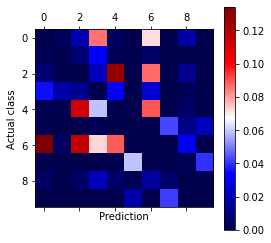

In [20]:
row_sums = conf_mat.sum(axis=1, keepdims=True)
norm_conf_mat = conf_mat / row_sums
# Replace rates on diagonal (correct classifitions) by zeros    
if let_plot:
    np.fill_diagonal(norm_conf_mat, 0)
    plt.matshow(norm_conf_mat,cmap=plt.cm.seismic)
    plt.xlabel("Prediction")
    plt.ylabel("Actual class")
    plt.colorbar()
    plt.savefig("figs/confusion_matrix_errors_plot", tight_layout=False)
    plt.show()

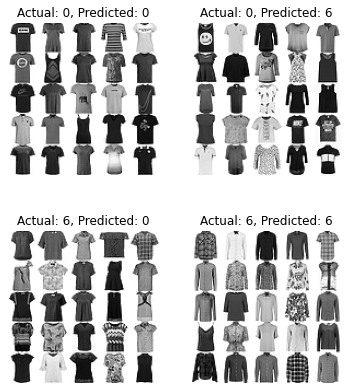

In [21]:
# 8.4. Plot examples of 3s and 5s
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

class_A = 0
class_B = 6
X_class_AA = X_train[(y_train == class_A) & (y_train_pred == class_A)]
X_class_AB = X_train[(y_train == class_A) & (y_train_pred == class_B)]
X_class_BA = X_train[(y_train == class_B) & (y_train_pred == class_A)]
X_class_BB = X_train[(y_train == class_B) & (y_train_pred == class_B)] 
let_plot = True    
if let_plot:
    plt.figure(figsize=(6,7))
    plt.subplot(221); plot_digits(X_class_AA[0:25], images_per_row=5)
    plt.title("Actual: " + str(class_A) + ", Predicted: " + str(class_A))
    plt.subplot(222); plot_digits(X_class_AB[0:25], images_per_row=5)
    plt.title("Actual: " + str(class_A) + ", Predicted: " + str(class_B))
    plt.subplot(223); plot_digits(X_class_BA[0:25], images_per_row=5)
    plt.title("Actual: " + str(class_B) + ", Predicted: " + str(class_A))
    plt.subplot(224); plot_digits(X_class_BB[0:25], images_per_row=5)
    plt.title("Actual: " + str(class_B) + ", Predicted: " + str(class_B))
    plt.show()

In [22]:
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [23]:
from sklearn.neighbors import KNeighborsClassifier
# Warning: takes time for new run!
new_run = False 
knn_clf = KNeighborsClassifier()
if new_run == True:
    knn_clf.fit(X_train, y_multilabel)
    joblib.dump(knn_clf,'saved_var/knn_clf')
else:
    knn_clf = joblib.load('saved_var/knn_clf')


In [24]:
# Try prediction
sample_id = 14652;
print(knn_clf.predict([X_train[sample_id]]))
print(y_train[sample_id])
print(y_multilabel[sample_id])

[[False False]]
2
[False False]


In [ ]:
y_multilabel


In [25]:
new_run = False
if new_run == True:
    y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
    joblib.dump(y_train_knn_pred,'saved_var/y_train_knn_pred')
else:
    y_train_knn_pred = joblib.load('saved_var/y_train_knn_pred')
f1_score(y_multilabel, y_train_knn_pred, average="macro") # macro: unweighted mean, weighted: average weighted by support (no. of true instances for each label)


0.9659623987319219

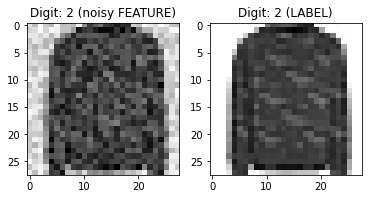

In [26]:
import random 
def plot_digit(data, label = 'unspecified', showed=True):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary)
    plt.title("Digit: " + str(label))
    #plt.axis("off")
    if showed:
        plt.show()
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
# Labels now are clear images
y_train_mod = X_train
y_test_mod = X_test
# Plot a sample and its label
if let_plot:
    sample_id = 234
    plt.subplot(121); 
    plot_digit(X_train_mod[sample_id],str(y_train[sample_id])+" (noisy FEATURE)",showed=False)
    plt.subplot(122); 
    plot_digit(y_train_mod[sample_id],str(y_train[sample_id])+" (LABEL)",showed=True)

In [27]:
new_run = False
if new_run == True:
    knn_clf.fit(X_train_mod, y_train_mod)
    joblib.dump(knn_clf,'saved_var/knn_clf_multioutput')
else:
    knn_clf = joblib.load('saved_var/knn_clf_multioutput')

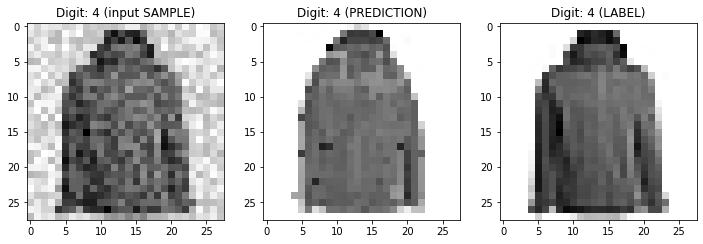

In [28]:
sample_id = 433
clean_digit = knn_clf.predict([X_test_mod[sample_id]])    
if let_plot:
    plt.figure(figsize=[12,5])
    plt.subplot(131); 
    plot_digit(X_test_mod[sample_id],str(y_test[sample_id])+" (input SAMPLE)",showed=False)
    plt.subplot(132); 
    plot_digit(clean_digit,str(y_test[sample_id])+" (PREDICTION)",showed=False)
    plt.subplot(133); 
    plot_digit(y_test_mod[sample_id],str(y_test[sample_id])+" (LABEL)",showed=True)

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

param_grid = {'n_neighbors': [3, 4, 5], 'weights': ['uniform', 'distance'], 'kernel':('linear', 'rbf')}
knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3, n_jobs=-1)
grid_search.fit(X_test, y_test)
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.cv_results_)

y_pred = grid_search.predict(X_test)
print(accuracy_score(y_test, y_pred))
# End of our classification tour.

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [4]:
grid_search = joblib.load('saved_var/knn_grid_search_multioutput')
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.cv_results_)

0.8574166666666667
{'n_neighbors': 4, 'weights': 'distance'}
{'mean_fit_time': array([0.06529422, 0.09695692, 0.19783244, 0.19192791, 0.32598562,
       0.13373547]), 'std_fit_time': array([0.01726182, 0.01224527, 0.08241056, 0.09146965, 0.28755978,
       0.02543117]), 'mean_score_time': array([401.84266543, 336.40864396, 441.83504686, 445.68336058,
       211.95361681, 171.31001258]), 'std_score_time': array([ 88.99680293, 139.37693782, 253.88203525, 203.91502469,
        82.51562982,  53.58024219]), 'param_n_neighbors': masked_array(data=[3, 3, 4, 4, 5, 5],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_weights': masked_array(data=['uniform', 'distance', 'uniform', 'distance',
                   'uniform', 'distance'],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_neighbors': 3, 'weights': 'uniform'}, {'n_neighbors': 3, 'weights': '